In [4]:
import pandas as pd
from modlamp.descriptors import GlobalDescriptor

In [5]:
def get_mw(sequence):
    """Molecular Weight"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.calculate_MW(amide=True)
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_isoelectric_point(sequence):
    """Isoelectric point"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.isoelectric_point(amide=True)
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_charge_density(sequence):
    """Charge density"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.charge_density(ph=7, amide=True)
        return round(desc.descriptor[0][0], 5)
    except:
        return None

def get_charge(sequence):
    """Charge"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.calculate_charge(ph=7, amide=True)
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_instability_index(sequence):
    """Instability index"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.instability_index()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_aromaticity(sequence):
    """Aromaticity"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.aromaticity()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_aliphatic_index(sequence):
    """Aliphatic index"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.aliphatic_index()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_boman_index(sequence):
    """Boman index"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.boman_index()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_hydrophobic_ratio(sequence):
    """Hydrophobic ratio"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.hydrophobic_ratio()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_frequency_residue(sequence, residue):
    return round(sequence.count(residue)/len(sequence), ndigits=4)

In [3]:
df_data = pd.read_csv("../process_results/1_processed_dataset.csv")
df_data.head(n=5)

,id_seq,description,sequence,id,organism,genero,primaryAccession,taxonID,is_fungal,ec_number_list,length_seq
0,sp|A0A336U966|TYRP_ASPTE,sp|A0A336U966|TYRP_ASPTE Tyrosinase P OS=Asper...,MGFYRNLVLVAASCTQALGLCPAPRCDSPDIRHEWGELSREDRLSY...,A0A336U966,Aspergillus terreus,Aspergillus,A0A336U966,33178,True,1.14.18.-,356
1,sp|B0Y4X4|MPKA_ASPFC,sp|B0Y4X4|MPKA_ASPFC Mitogen-activated protein...,MSDLQGRKVFKVFNQDFIVDERYNVTKELGQGAYGIVCAATNVHTG...,B0Y4X4,Aspergillus fumigatus,Aspergillus,B0Y4X4,451804,True,2.7.11.24,424
2,sp|E9RBR0|ABR2_ASPFU,sp|E9RBR0|ABR2_ASPFU Laccase abr2 OS=Aspergill...,MWYQSASLLGVAAVAQAATVHYSLDLTWETGSPNGVSREMIFVNGQ...,E9RBR0,Aspergillus fumigatus,Aspergillus,E9RBR0,330879,True,1.10.3.-,587
3,sp|J9VHN6|X325_CRYNH,sp|J9VHN6|X325_CRYNH Copper acquisition factor...,MFALKSILVTSLITSTALAHFTLDYPQSRGFVDDTENQFCGGFNTV...,J9VHN6,Cryptococcus neoformans var. grubii serotype A,Cryptococcus,J9VHN6,235443,True,NaN,218
4,sp|J9VND2|CDA2_CRYNH,sp|J9VND2|CDA2_CRYNH Chitin deacetylase 2 OS=C...,MIPSTAAALLTLTAGAAFAHTGCGGHEIGRRNVGGPMLYRRAVTDE...,J9VND2,Cryptococcus neoformans var. grubii serotype A,Cryptococcus,J9VND2,235443,True,3.5.1.41,455


### Getting descriptors

In [6]:
LIST_RESIDUES = [
    'A', 
    'C', 
    'D', 
    'E', 
    'F', 
    'G', 
    'H', 
    'I', 
    'N', 
    'K', 
    'L', 
    'M', 
    'P', 
    'Q', 
    'R', 
    'S', 
    'T', 
    'V', 
    'W', 
    'Y'
]

In [7]:
df_data["Molecular Weight"] = df_data["sequence"].apply(lambda x: get_mw(x))
df_data["Isoelectric point"] = df_data["sequence"].apply(lambda x: get_isoelectric_point(x))
df_data["Charge density"] = df_data["sequence"].apply(lambda x: get_charge_density(x))
df_data["Charge"] = df_data["sequence"].apply(lambda x: get_charge(x))
df_data["Instability index"] = df_data["sequence"].apply(lambda x: get_instability_index(x))
df_data["Aromaticity"] = df_data["sequence"].apply(lambda x: get_aromaticity(x))
df_data["Aliphatic index"] = df_data["sequence"].apply(lambda x: get_aliphatic_index(x))
df_data["Boman index"] = df_data["sequence"].apply(lambda x: get_boman_index(x))
df_data["Hydrophobic ratio"] = df_data["sequence"].apply(lambda x: get_hydrophobic_ratio(x))

for residue in LIST_RESIDUES:

    name_col = f"freq_{residue}"

    df_data[name_col] = df_data["sequence"].apply(
        lambda x : get_frequency_residue(x, residue)
    )


In [9]:
df_data.columns

Index(['id_seq', 'description', 'sequence', 'id', 'organism', 'genero',
       'primaryAccession', 'taxonID', 'is_fungal', 'ec_number_list',
       'length_seq', 'Molecular Weight', 'Isoelectric point', 'Charge density',
       'Charge', 'Instability index', 'Aromaticity', 'Aliphatic index',
       'Boman index', 'Hydrophobic ratio', 'freq_A', 'freq_C', 'freq_D',
       'freq_E', 'freq_F', 'freq_G', 'freq_H', 'freq_I', 'freq_N', 'freq_K',
       'freq_L', 'freq_M', 'freq_P', 'freq_Q', 'freq_R', 'freq_S', 'freq_T',
       'freq_V', 'freq_W', 'freq_Y'],
      dtype='object')

In [10]:
df_data["genero"].value_counts()

genero
Aspergillus         29
Cryptococcus        12
Metarhizium          5
Agaricus             4
Zymoseptoria         3
Botryotinia          2
Pestalotiopsis       2
Pyricularia          1
Mycosarcoma          1
Verticillium         1
Claviceps            1
Cryptosporiopsis     1
Name: count, dtype: int64

In [11]:
df_data["is_aspergilus"] = df_data["genero"] == "Aspergillus"

In [12]:
df_data["is_aspergilus"].value_counts()

is_aspergilus
False    33
True     29
Name: count, dtype: int64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [16]:
columns_to_plot_distribution = ['Molecular Weight', 'Isoelectric point', 'Charge density',
       'Charge', 'Instability index', 'Aromaticity', 'Aliphatic index',
       'Boman index', 'Hydrophobic ratio']

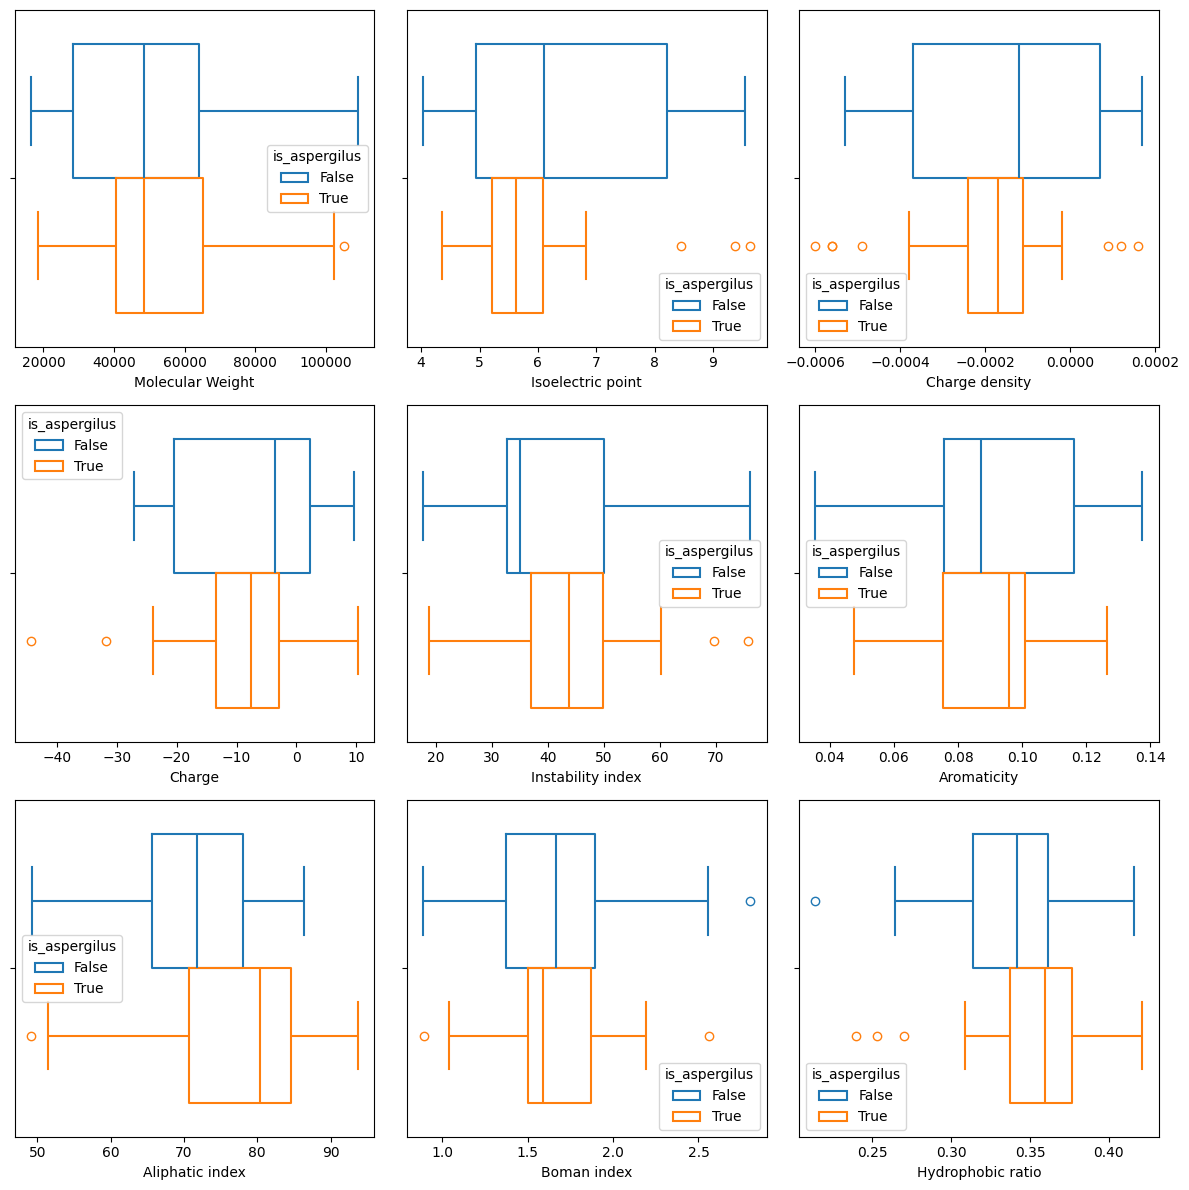

In [17]:
fig = plt.figure(figsize=(12, 12))
gs = GridSpec(3, 3, figure=fig)

index=0
for i in range(3):
    for j in range(3):
        axis_data = fig.add_subplot(gs[i,j])
        sns.boxplot(
            data=df_data,
            x=columns_to_plot_distribution[index],
            hue="is_aspergilus",
            fill=False,
            ax=axis_data
        )
        index+=1

plt.tight_layout()